# Chapter 2 - Exercises

## [2.1.8] Exercises (Data manipulation)

### question 1

1) Run the code in this section. Change the conditional statement X == Y in this section to X < Y or X > Y, and then see what kind of tensor you can get.

As expected components are compared elementwise

### question 2

2) Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

As seen below the broadcasting is similar in high dimensions - the tensors are replicated to meet the dimension required

In [1]:
import torch

x = torch.tensor([[[1],[43],[2]],[[2],[3],[5]]])
y = torch.tensor([[[9,10,3],[1,2,3],[1,2,3]],[[9,10,3],[1,2,3],[1,2,3]]])
z = x + y

# print(x.shape, y.shape)
# print(x, y)
# print(z.shape)
# print(z)

## [2.2.5] Exercises (Data pre-processing)

### Create a raw dataset with more rows and columns.

In [2]:
import random
from datetime import datetime

import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta

# First we create example dataframe
r = random.Random(12)

def generate_random_date_in_last_year():
    return (datetime.now() - relativedelta(days=365 * random.random()))


dataframe = pd.DataFrame({
    "date_time": [generate_random_date_in_last_year() for _ in range(10)],
    "animal": ['zebra', 'NA', 'zebra', 'NA', 'lion', 'lion', 'lion',
               'lion', 'rhino', 'rhino', ],
    "category": ['stripy'] * 4 + ['dangerous'] * 6,
    "name": ['Walter', 'NA', 'Gyles', 'NA', 'Bartholomew', 'Frederyk',
             'Raulf', 'Symond', 'Carlos', 'Arthur'],
    "weight": [80 + 40 * r.random() for _ in range(10)],
    "favourite_integer": [r.randint(0, 100) for _ in range(10)],
    "bad_column": ['', 3, '', 1, None, 2, None, 2, 'NA', 3],
    'employed': [bool(r.randint(0, 1)) for i in range(10)]
})

dataframe.to_csv('../data/animals.csv')

In [3]:
animals = pd.read_csv('../data/animals.csv',index_col=0)
animals.head()

,date_time,animal,category,name,weight,favourite_integer,bad_column,employed
0,2019-11-03 03:14:09.788204,zebra,stripy,Walter,98.982827,71,NaN,False
1,2020-08-14 15:33:07.017844,NaN,stripy,NaN,106.298900,0,3.0,False
2,2019-11-20 21:58:13.119466,zebra,stripy,Gyles,106.656419,84,NaN,False
3,2020-03-12 14:16:23.782109,NaN,stripy,NaN,85.704014,79,1.0,True
4,2020-07-20 10:48:31.359480,lion,dangerous,Bartholomew,80.434418,18,NaN,True


### question 1

Delete the column with the most missing values.

In [4]:
column_to_delete = max(
    [(x, y) for x,y in animals.isna().sum().items()],
    key=lambda x: x[1])[0]

In [5]:
column_to_delete

'bad_column'

In [6]:
no_bad_col = animals.drop(column_to_delete, axis=1)
no_bad_col.head()

,date_time,animal,category,name,weight,favourite_integer,employed
0,2019-11-03 03:14:09.788204,zebra,stripy,Walter,98.982827,71,False
1,2020-08-14 15:33:07.017844,NaN,stripy,NaN,106.298900,0,False
2,2019-11-20 21:58:13.119466,zebra,stripy,Gyles,106.656419,84,False
3,2020-03-12 14:16:23.782109,NaN,stripy,NaN,85.704014,79,True
4,2020-07-20 10:48:31.359480,lion,dangerous,Bartholomew,80.434418,18,True


### Question 2

Convert the preprocessed dataset to the tensor format.

In [7]:
no_bad_col.date_time = pd.to_datetime(no_bad_col.date_time).astype(np.int64)
no_bad_col.employed = no_bad_col.employed.astype(int)

In [8]:
inputs = pd.get_dummies(no_bad_col, dummy_na=True)

In [9]:
inputs.dtypes

date_time               int64
weight                float64
favourite_integer       int64
employed                int64
animal_lion             uint8
animal_rhino            uint8
animal_zebra            uint8
animal_nan              uint8
category_dangerous      uint8
category_stripy         uint8
category_nan            uint8
name_Arthur             uint8
name_Bartholomew        uint8
name_Carlos             uint8
name_Frederyk           uint8
name_Gyles              uint8
name_Raulf              uint8
name_Symond             uint8
name_Walter             uint8
name_nan                uint8
dtype: object

In [10]:
X = torch.tensor(inputs.values)
X

tensor([[1.5728e+18, 9.8983e+01, 7.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00],
        [1.5974e+18, 1.0630e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00],
        [1.5743e+18, 1.0666e+02, 8.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [1.5840e+18, 8.5704e+01, 7.9000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       

## [2.3.13.] Exercises (Linear algebra)

### question 1

Prove that the transpose of a matrix  𝐀 ’s transpose is  𝐀 :  (𝐀⊤)⊤=𝐀 .

Let $$\mathbf{A} \in \mathbb{R}^{m\times n}$$
Let $$i \in 1\dots m\quad j \in 1\dots n$$
then by the definition of transpose (applied twice)
$$
\begin{aligned}
\left[(\mathbf{A}^T)^T\right]_{i,j} &= \left[(\mathbf{A}^T)\right]_{j,i} \\
&= \left[\mathbf{A}\right]_{i,j} \\
\implies
(\mathbf{A}^T)^T &= \mathbf{A}
\end{aligned}
$$


### question 2

Given two matrices  𝐀  and  𝐁 , show that the sum of transposes is equal to the transpose of a sum:  𝐀⊤+𝐁⊤=(𝐀+𝐁)⊤ .

Let $$\mathbf{A},\mathbf{B} \in \mathbb{R}^{m\times n}$$
and let $$i \in 1\dots m\quad j \in 1\dots n$$

$$
\begin{aligned}
\left[\mathbf{A}^T+\mathbf{B}^T\right]_{i,j} 
&= \left[\mathbf{A}^T\right]_{i,j}+\left[\mathbf{B}^T\right]_{i,j} \\
&= \left[\mathbf{A}\right]_{j,i}+\left[\mathbf{B}\right]_{j,i} \\
&= \left[(\mathbf{A}+\mathbf{B})^T\right]_{j,i} \\
&= \left[\mathbf{A+B}\right]_{i,j} \\
\implies
(\mathbf{A}^T + \mathbf{B}^T) &= (\mathbf{A}+\mathbf{B})^T
\end{aligned}
$$

### question 3

Given any square matrix  𝐀 , is  𝐀+𝐀⊤  always symmetric? Why?

Yes - here is a proof

Let $$\mathbf{A} \in \mathbb{R}^{n\times n}$$
and let $$i,j \in 1\dots n$$

Using the previous two questions

$$
\begin{aligned}
(\mathbf{A}+\mathbf{A}^T) ^ T
&= \mathbf{A}^T + (\mathbf{A}^T)^ T \quad\text{from question 2}\\
&= \mathbf{A}^T + \mathbf{A} \quad\text{from question 1}\\
&= \mathbf{A} + \mathbf{A}^T
\implies (\mathbf{A}+\mathbf{A}^T) \text{ symmetric}
\end{aligned}
$$

### question 4

We defined the tensor X of shape (2, 3, 4) in this section. What is the output of len(X)?

In [11]:
import torch
X = torch.ones(size=(2,3,4))
len(X)

2

### question 5

For a tensor X of arbitrary shape, does len(X) always correspond to the length of a certain axis of X? What is that axis?

len returns the legth of the first axis 

### question 6

Run A / A.sum(axis=1) and see what happens. Can you analyze the reason?

In [12]:
# A = torch.arange(20).reshape(5, 4)
# A / A.sum(axis=1)

The error is because the dimension (5,4) and (5) don't match or allow for broad casting. use keep_dims to fix.

### question 7

When traveling between two points in Manhattan, what is the distance that you need to cover in terms of the coordinates, i.e., in terms of avenues and streets? Can you travel diagonally?

Along the blocks and up the avenues with no diagonals ... this is referring to the $L_1$ norm. Also known as the Manhattan distance.

### question 8

Consider a tensor with shape (2, 3, 4). What are the shapes of the summation outputs along axis 0, 1, and 2?

In [13]:
(3,4),(2,4),(2,3)

((3, 4), (2, 4), (2, 3))

### question 9

Feed a tensor with 3 or more axes to the linalg.norm function and observe its output. What does this function compute for tensors of arbitrary shape?

In [14]:
torch.norm(X)

tensor(4.8990)

In [15]:
# really this is the root of the sum of the square of each element 
sum(X ** 2).sum() ** 0.5

tensor(4.8990)

## [2.4.6.] Exercises (Calculus)

### question 1

Plot the function  𝑦=𝑓(𝑥)=𝑥3−1𝑥  and its tangent line when  𝑥=1 .

In [1]:
%matplotlib inline
from d2l import torch as d2l
from IPython import display
import numpy as np

def f(x):
    return x ** 3 - (1 / x)


def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

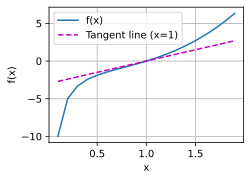

In [8]:
x = np.arange(0.1, 2, 0.1)
plot(x, [f(x), 3 * x  -3 ], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### question 2

Find the gradient of the function  𝑓(𝐱)=3𝑥21+5𝑒𝑥2 .

In [10]:
def grad_f(x_1,x_2):
    return np.array([6 * x_1, 10 * np.exp(x_2)])

### question 3

What is the gradient of the function  𝑓(𝐱)=‖𝐱‖2 ?

$2*\mathbf{x}$

### question 4

Can you write out the chain rule for the case where  𝑢=𝑓(𝑥,𝑦,𝑧)  and  𝑥=𝑥(𝑎,𝑏) ,  𝑦=𝑦(𝑎,𝑏) , and  𝑧=𝑧(𝑎,𝑏) ?

$$
\frac{\partial f}{\partial a} = 
\frac{\partial f}{\partial x}\frac{\partial x}{\partial a} +
\frac{\partial f}{\partial y}\frac{\partial y}{\partial a} +
\frac{\partial f}{\partial z}\frac{\partial z}{\partial a}
$$

## xxx